In [8]:
import numpy as np
import pandas as pd
%matplotlib inline

## Hipóteses

- Houve um aumento da progressão dos ataques nos últimos 50 anos (total e por país)?
- Quais países tem mais ataques letais? 
- Dos 5 países onde há mais ataques letais, qual a taxa de letalidade e onde ela cresce/diminui?

In [9]:
df = pd.read_csv('attacks.csv', encoding='latin-1')

In [10]:
df.shape

(25723, 24)

In [11]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [12]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [14]:
# Colunas Unnamed possuem valores 99.9% NaN e são dropadas
df.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)

In [15]:
# Colunas href formula e href são praticamente idênticas
df.drop(['href formula'], axis=1, inplace=True)

In [16]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'Case Number.1',
       'Case Number.2', 'original order'],
      dtype='object')

In [17]:
# Estudo sobre variável Species
df['Species '].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [18]:
# Foi identificado que 88 casos não tiveram confirmação de envolvimento de tubarões
# Essas linhas serão dropadas

df = df[df['Species ']!='Shark involvement not confirmed']

<AxesSubplot:>

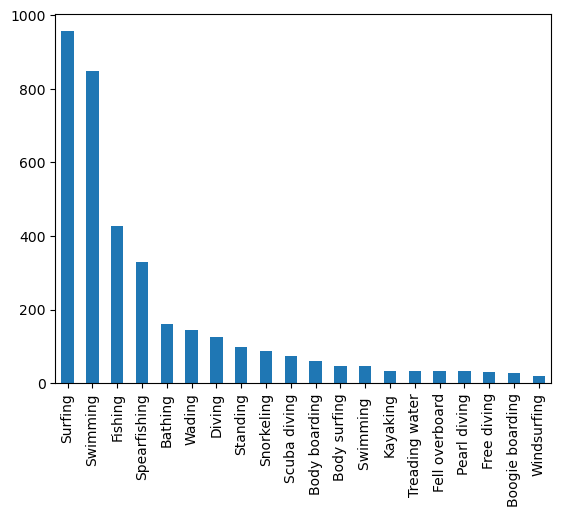

In [19]:
# Estudo sobre variável Activity
df['Activity'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

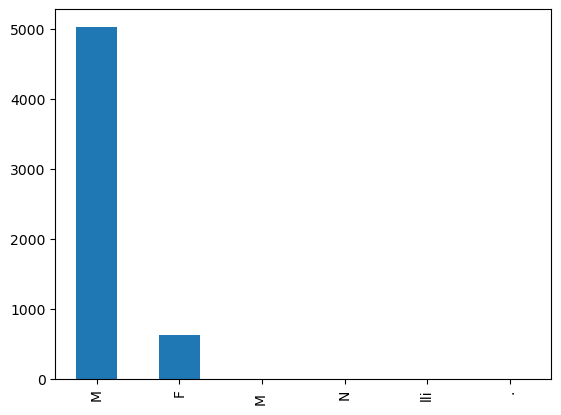

In [20]:
# Estudo sobre variável Sex
df['Sex '].value_counts().plot(kind='bar')

<AxesSubplot:>

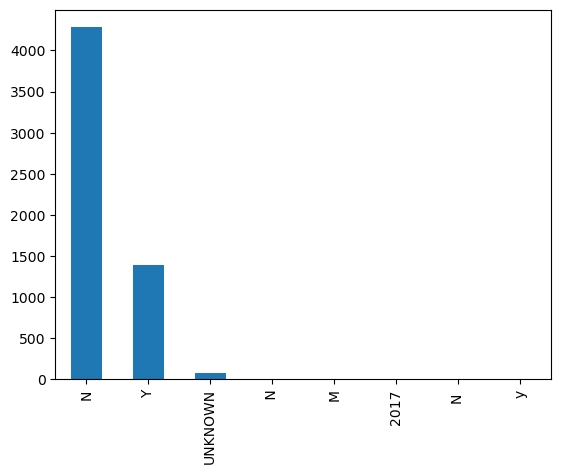

In [21]:
# Estudo sobre variável Fatal
df['Fatal (Y/N)'].value_counts().plot(kind='bar')

In [22]:
# Espécies mais fatais
df[df['Fatal (Y/N)']=='Y']['Species '].value_counts()

White shark                                                                                                                      44
Tiger shark                                                                                                                      25
Bull shark                                                                                                                       15
3.7 m [12'] shark                                                                                                                 9
3 m [10'] shark                                                                                                                   8
                                                                                                                                 ..
Tiger shark, 2.4 m 3.4 m [8' to 11']                                                                                              1
Tiger shark, 3.7 m [12']                                                    

In [23]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'Case Number.1',
       'Case Number.2', 'original order'],
      dtype='object')

In [24]:
#lista de colunas inúteis ou que não vou usar nas hipoteses (para dropar)
to_drop = ['Case Number', 'Date', 'Type', 'Activity', 'Name', 'Sex ', 'Age', 'Time', 'Species ', 
           'Investigator or Source', 'pdf', 'href', 'Case Number.1', 'Case Number.2', 'original order']

In [25]:
df.drop(labels=to_drop, axis=1, inplace=True)

In [26]:
df.columns

Index(['Year', 'Country', 'Area', 'Location', 'Injury', 'Fatal (Y/N)'], dtype='object')

In [27]:
df.dropna(axis=0, how='all', inplace=True)

In [28]:
df.shape

(6214, 6)

In [29]:
df.dropna(subset=['Year'], inplace=True)

In [30]:
df['Year'] = df['Year'].astype(int)

In [31]:
df

,Year,Country,Area,Location,Injury,Fatal (Y/N)
0,2018,USA,California,"Oceanside, San Diego County","No injury to occupant, outrigger canoe and pad...",N
1,2018,USA,Georgia,"St. Simon Island, Glynn County",Minor injury to left thigh,N
2,2018,USA,Hawaii,"Habush, Oahu",Injury to left lower leg from surfboard skeg,N
3,2018,AUSTRALIA,New South Wales,Arrawarra Headland,Minor injury to lower leg,N
4,2018,MEXICO,Colima,La Ticla,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...
6297,0,AUSTRALIA,Western Australia,Roebuck Bay,FATAL,Y
6298,0,AUSTRALIA,Western Australia,NaN,FATAL,Y
6299,0,USA,North Carolina,Ocracoke Inlet,FATAL,Y
6300,0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",FATAL,Y


In [32]:
df['Fatal (Y/N)'].map(lambda x: 1 if x == "Y" else 0)

0       0
1       0
2       0
3       0
4       0
       ..
6297    1
6298    1
6299    1
6300    1
6301    1
Name: Fatal (Y/N), Length: 6212, dtype: int64

In [33]:
df = df[df['Year']!=2018]
df = df[df['Year']>=1977]

<AxesSubplot:title={'center':'Nº de ataques nos últimos 50 anos'}, xlabel='Year', ylabel='Ataques'>

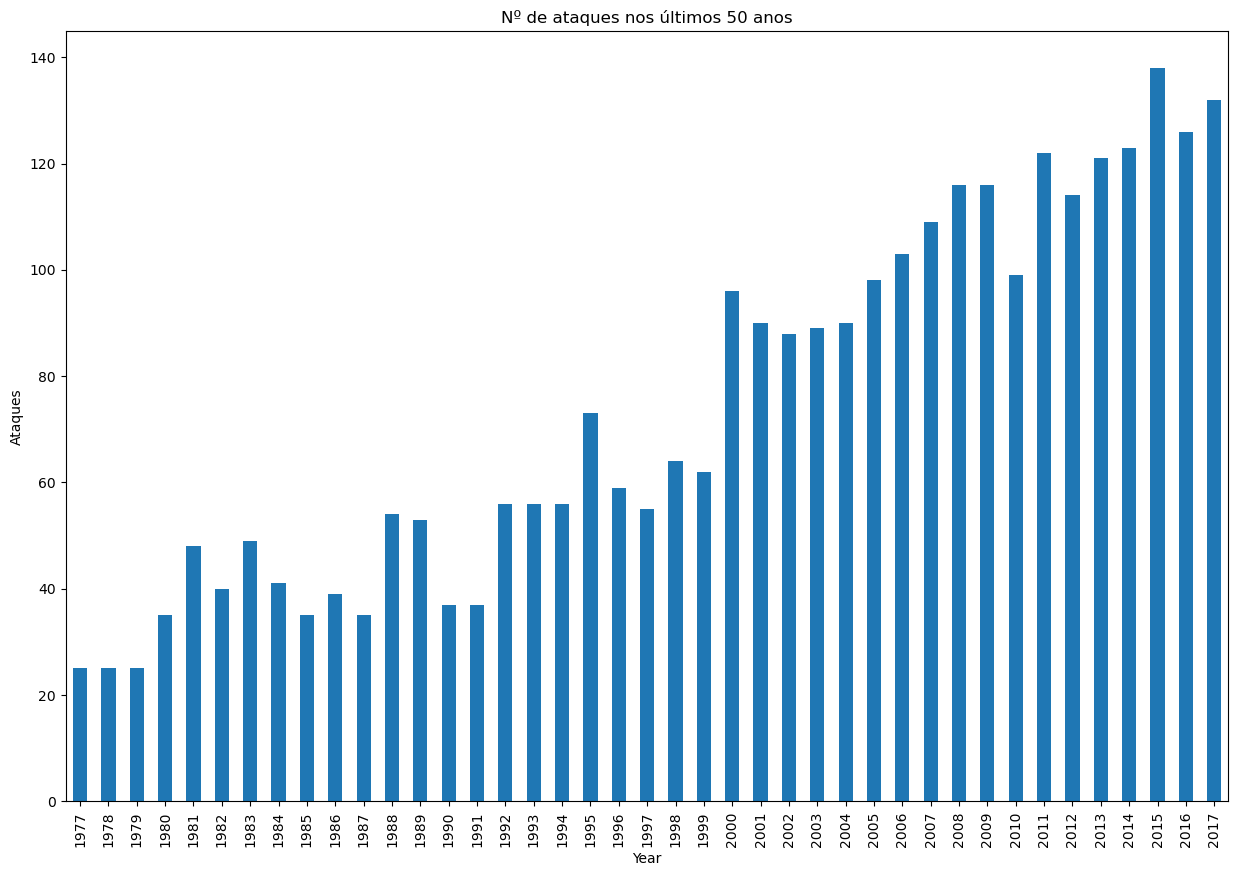

In [73]:
df.groupby('Year').size().plot(kind='bar', ylabel = 'Ataques', title = 'Nº de ataques nos últimos 50 anos',  figsize=(15,10))

In [35]:
df['ataques_por_pais'] = df.groupby('Country')["Year"].transform('size')

In [36]:
df.head()

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
53,2017,USA,Hawaii,"Hultin's Beach, Oahu",Severe lacerations to left thigh & knee,N,1466.0
54,2017,USA,California,"Drakes Estero, Point Reyes, Marin County",Foot bitten,N,1466.0
55,2017,MALAYSIA,Sepang,Bagan Lalang Beach,"Minor injury to thigh, PROVOKED INCIDENT",N,4.0
56,2017,BAHAMAS,NaN,NaN,Minor injury to arm,N,77.0
57,2017,COSTA RICA,Cocos Island,Manuelita,Serious injury to leg,N,7.0


<AxesSubplot:title={'center':'Ataques X País'}, xlabel='Country', ylabel='Nº de Ataques'>

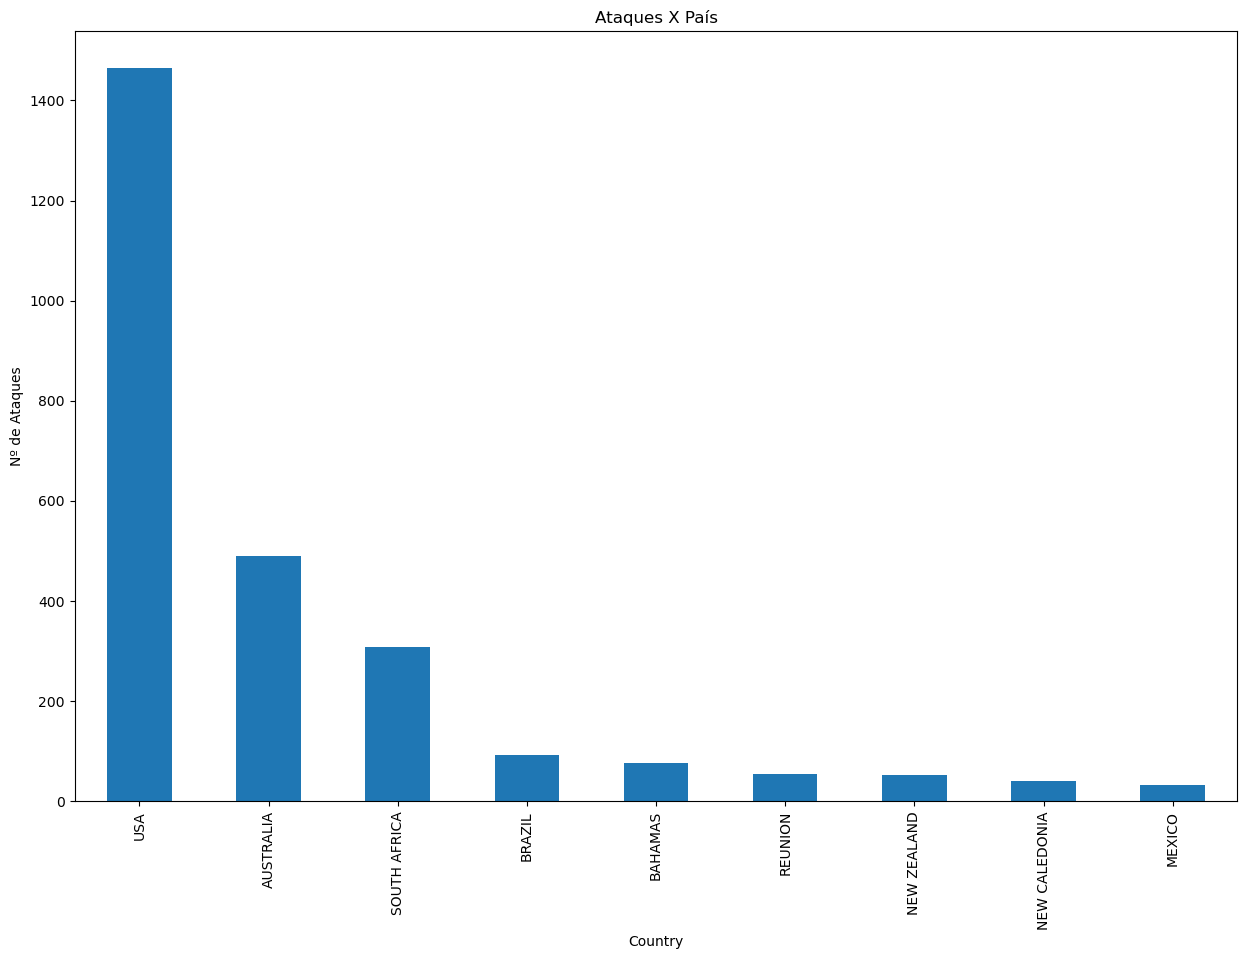

In [72]:
df[df['ataques_por_pais']> 25].groupby('Country').size().sort_values(ascending = False).plot(kind='bar',
                                                                                             figsize=(15,10),
                                                                                             ylabel='Nº de Ataques',
                                                                                             title='Ataques X País')


In [38]:
df.dropna(subset=['Injury'], inplace=True)

In [39]:
#https://stackoverflow.com/questions/47457886/how-to-make-a-slice-of-dataframe-and-fillna-in-specific-slice-using-python-pan

mask1 = (df['Injury'] == 'FATAL')&(df['Fatal (Y/N)'].isna())

df.loc[mask1, 'Fatal (Y/N)'] = df.loc[mask1, 'Fatal (Y/N)'].fillna('Y')

In [40]:
df.dropna(subset=['Country'], inplace=True)

In [41]:
df_lethal = df[(df['Injury'] == "FATAL") | (df["Fatal (Y/N)"] == 'Y')]

<AxesSubplot:title={'center':'Ataques letais X País'}, ylabel='Ataques Letais'>

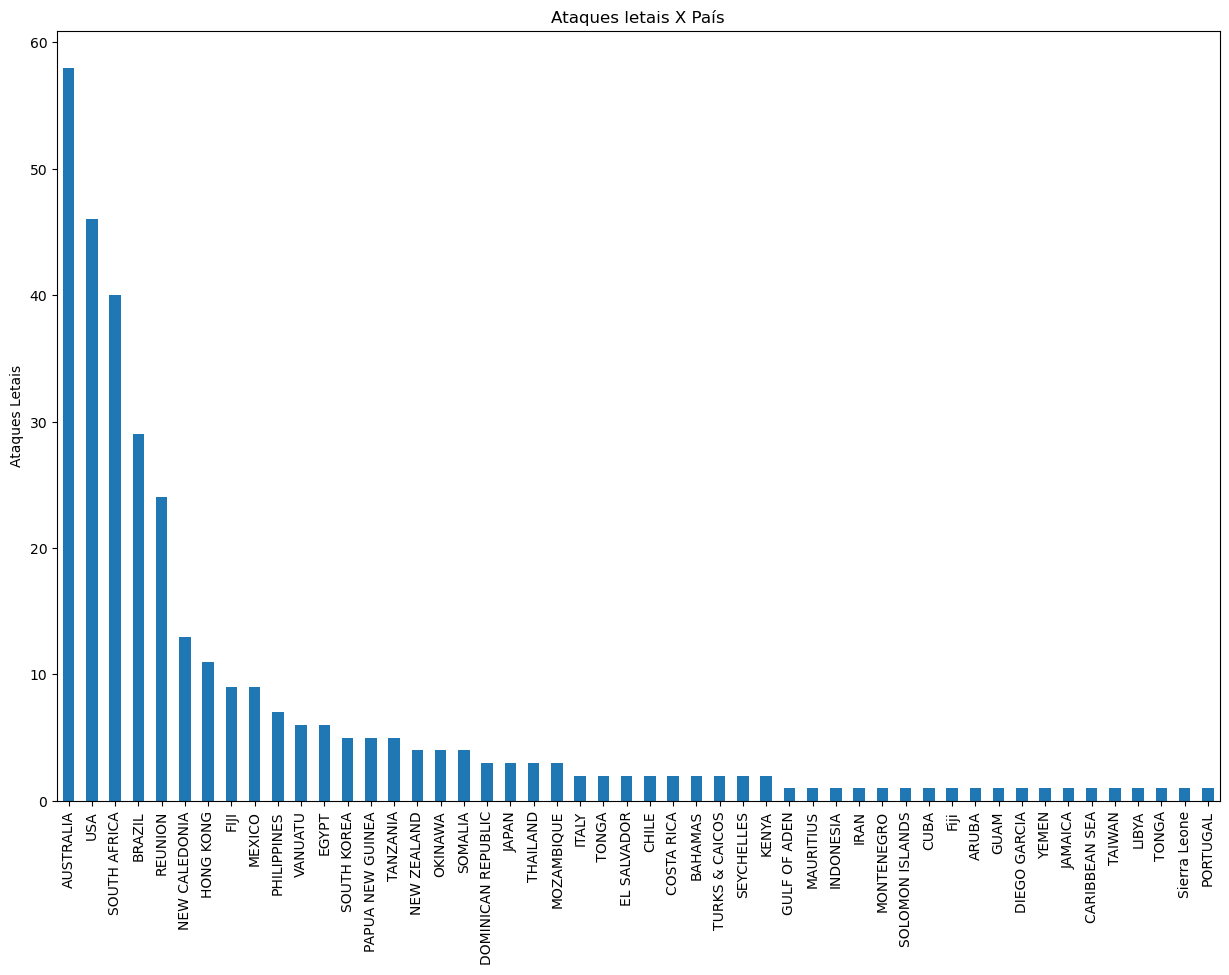

In [42]:
df_lethal.Country.value_counts().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais X País',  figsize=(15, 10))

In [43]:
df_lethal.Country.nunique()

50

In [44]:
lethal_AUS = df_lethal[df_lethal.Country == 'AUSTRALIA']
lethal_AUS

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
155,2017,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,FATAL,Y,492.0
267,2016,AUSTRALIA,Western Australia,Mindarie,FATAL,Y,492.0
271,2016,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",FATAL,Y,492.0
385,2015,AUSTRALIA,Tasmania,"Lachan Island, Mercury Passage",FATAL,Y,492.0
448,2015,AUSTRALIA,New South Wales,Shelly Beach,FATAL,Y,492.0
464,2014,AUSTRALIA,Western Australia,Three Stripes near Cheynes Beach,FATAL,Y,492.0
470,2014,AUSTRALIA,Queensland,Rudder Reef,FATAL,Y,492.0
500,2014,AUSTRALIA,New South Wales,"Clarkes Beach, Byron Bay",FATAL,Y,492.0
569,2014,AUSTRALIA,New South Wales,Tathra,FATAL,Y,492.0
582,2014,AUSTRALIA,South Australia,"Goldsmith Beach, Yorke Peninsula",FATAL,Y,492.0


In [45]:
lethal_USA = df_lethal[df_lethal.Country == 'USA']
lethal_USA

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
429,2015,USA,Hawaii,Kanahena Cove,FATAL,Y,1466.0
596,2013,USA,Hawaii,"Between Makena & Molokini, Maui",FATAL,Y,1466.0
639,2013,USA,Hawaii,"Makenat, Maui",FATAL,Y,1466.0
728,2012,USA,California,"Surf Beach, Lompoc, Santa Barbara County",FATAL,Y,1466.0
978,2010,USA,California,"Surf Beach, Vandenberg AFB, Santa Barbara County",FATAL,Y,1466.0
1045,2010,USA,Florida,"Stuart, Martin County",FATAL,Y,1466.0
1091,2009,USA,North Carolina,"Corolla, Currituck County",FATAL,Y,1466.0
1158,2009,USA,Puerto Rico,Quebradillas,It is probable that all 5 passengers died on i...,Y,1466.0
1268,2008,USA,California,"Solana Beach, San Diego County",FATAL,Y,1466.0
1549,2005,USA,South Carolina,Folly Beach,FATAL,Y,1466.0


In [46]:
lethal_SA = df_lethal[df_lethal.Country == 'SOUTH AFRICA']
lethal_SA

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
76,2017,SOUTH AFRICA,Western Cape Province,Dyer Island,FATAL,Y,309.0
91,2017,SOUTH AFRICA,Western Cape Province,Dyer Island,FATAL,Y,309.0
571,2014,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St Johns",FATAL,Y,309.0
613,2013,SOUTH AFRICA,Eastern Cape Province,"Albatros Point, near Jeffrey's Bay",FATAL,Y,309.0
715,2012,SOUTH AFRICA,Eastern Cape Province,Port St. John's,FATAL,Y,309.0
799,2012,SOUTH AFRICA,Western Cape Province,Caves near Kogel Bay,FATAL,Y,309.0
825,2012,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",FATAL,Y,309.0
879,2011,SOUTH AFRICA,Western Cape Province,"Lookout Beach, near the Keurbooms river mouth ...",FATAL,Y,309.0
921,2011,SOUTH AFRICA,KwaZulu-Natal,Levan Point,"Thigh bitten, FATAL",Y,309.0
954,2011,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. John's",FATAL,Y,309.0


In [47]:
lethal_BR = df_lethal[df_lethal.Country == 'BRAZIL']
lethal_BR

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
651,2013,BRAZIL,Pernambuco,"Boa Viagem Beach, Recife",FATAL,Y,95.0
673,2013,BRAZIL,Pernambuco,Coral Cove Beach,FATAL,Y,95.0
751,2012,BRAZIL,Pernambuco,"Coral Cove, Cabo de Santo Agostinho",FATAL,Y,95.0
1090,2009,BRAZIL,Pernambuco,"Piedade, Recife",Cause of death was drowning; his remains were ...,Y,95.0
1092,2009,BRAZIL,Pernambuco,"Piedade, Recife",FATAL,Y,95.0
1434,2006,BRAZIL,NaN,NaN,FATAL,Y,95.0
1460,2006,BRAZIL,Pernambuco,Body recovered at Goiana,FATAL,Y,95.0
1471,2006,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Left thigh bitten FATAL,Y,95.0
1640,2004,BRAZIL,Pernambuco,"Pina, Recife",FATAL,Y,95.0
1675,2004,BRAZIL,Pernambuco,Piedade,FATAL,Y,95.0


In [48]:
lethal_REU = df_lethal[df_lethal.Country == 'REUNION']
lethal_REU

,Year,Country,Area,Location,Injury,Fatal (Y/N),ataques_por_pais
149,2017,REUNION,Saint-Leu,Pointe au Sal,FATAL,Y,54.0
174,2017,REUNION,Saint-Andre,NaN,Fatal,Y,54.0
434,2015,REUNION,Saint-Gilles-les-Bains,Cap Homard,FATAL,Y,54.0
447,2015,REUNION,dÉtang-Salé,Ravine Mula,FATAL,Y,54.0
654,2013,REUNION,Saint-Paul,Le cimetière marin,FATAL,Y,54.0
677,2013,REUNION,Saint-Gilles,Brisant Beach,FATAL,Y,54.0
762,2012,REUNION,Trois-Bassins,NaN,FATAL,Y,54.0
865,2011,REUNION,Saint-Gilles,Boucan-Canot,FATAL,Y,54.0
910,2011,REUNION,Saint-Gilles-les-Bains,Boucan-Canot,FATAL,Y,54.0
1444,2006,REUNION,Saint-Pierre,Pointe du Diable,FATAL,Y,54.0


<AxesSubplot:title={'center':'Ataques letais nos EUA'}, xlabel='Year', ylabel='Ataques Letais'>

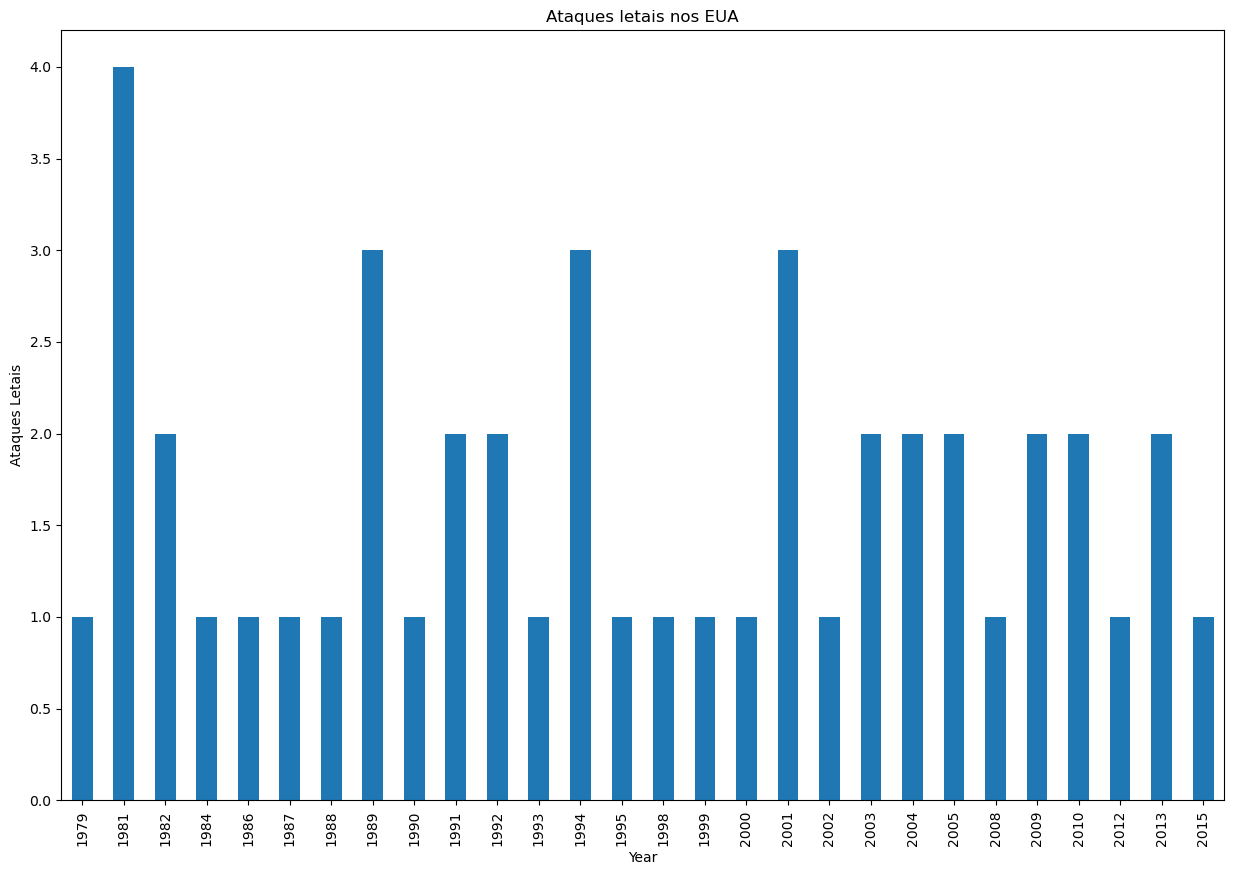

In [49]:
lethal_USA.groupby(by = 'Year').size().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais nos EUA',  figsize=(15, 10))

<AxesSubplot:title={'center':'Ataques letais na Australia'}, xlabel='Year', ylabel='Ataques Letais'>

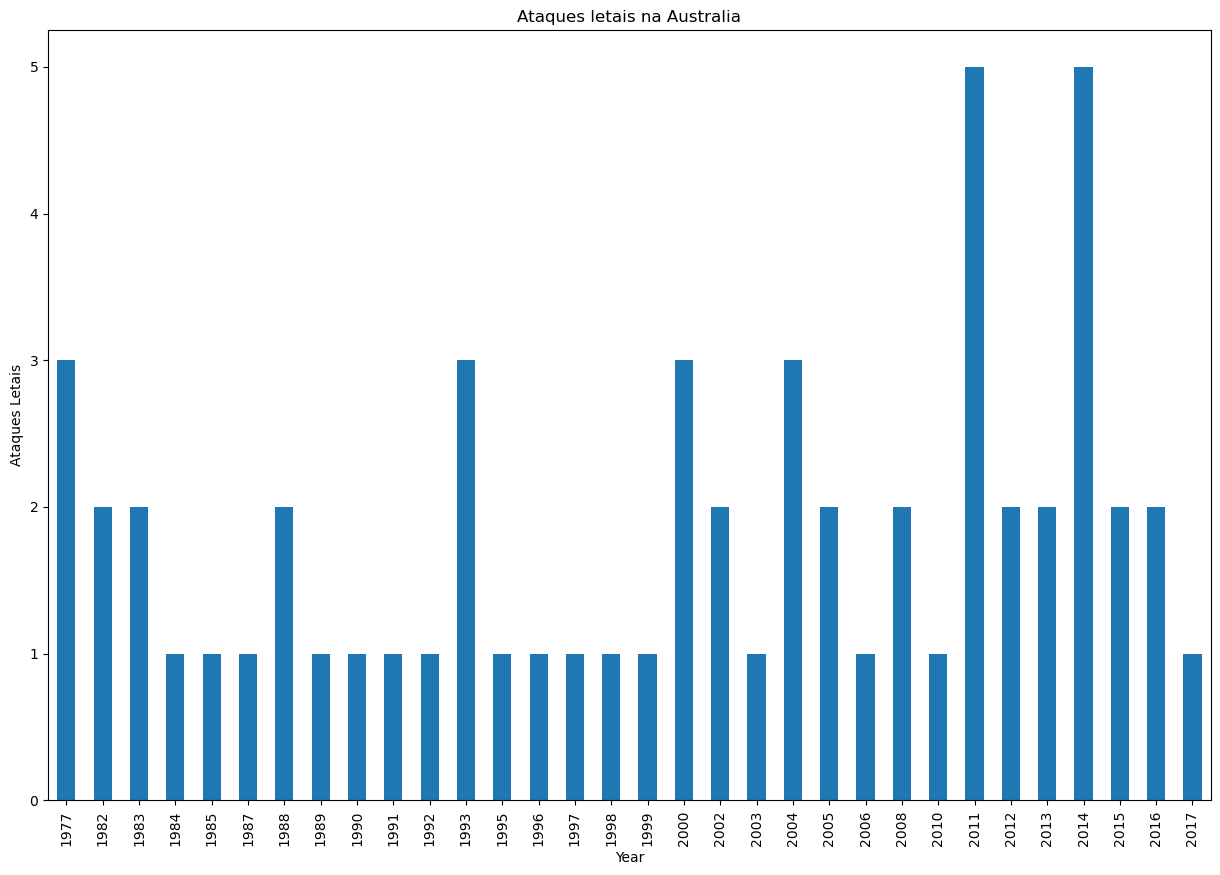

In [50]:
lethal_AUS.groupby(by = 'Year').size().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais na Australia',  figsize=(15, 10))

<AxesSubplot:title={'center':'Ataques letais na Africa do Sul'}, xlabel='Year', ylabel='Ataques Letais'>

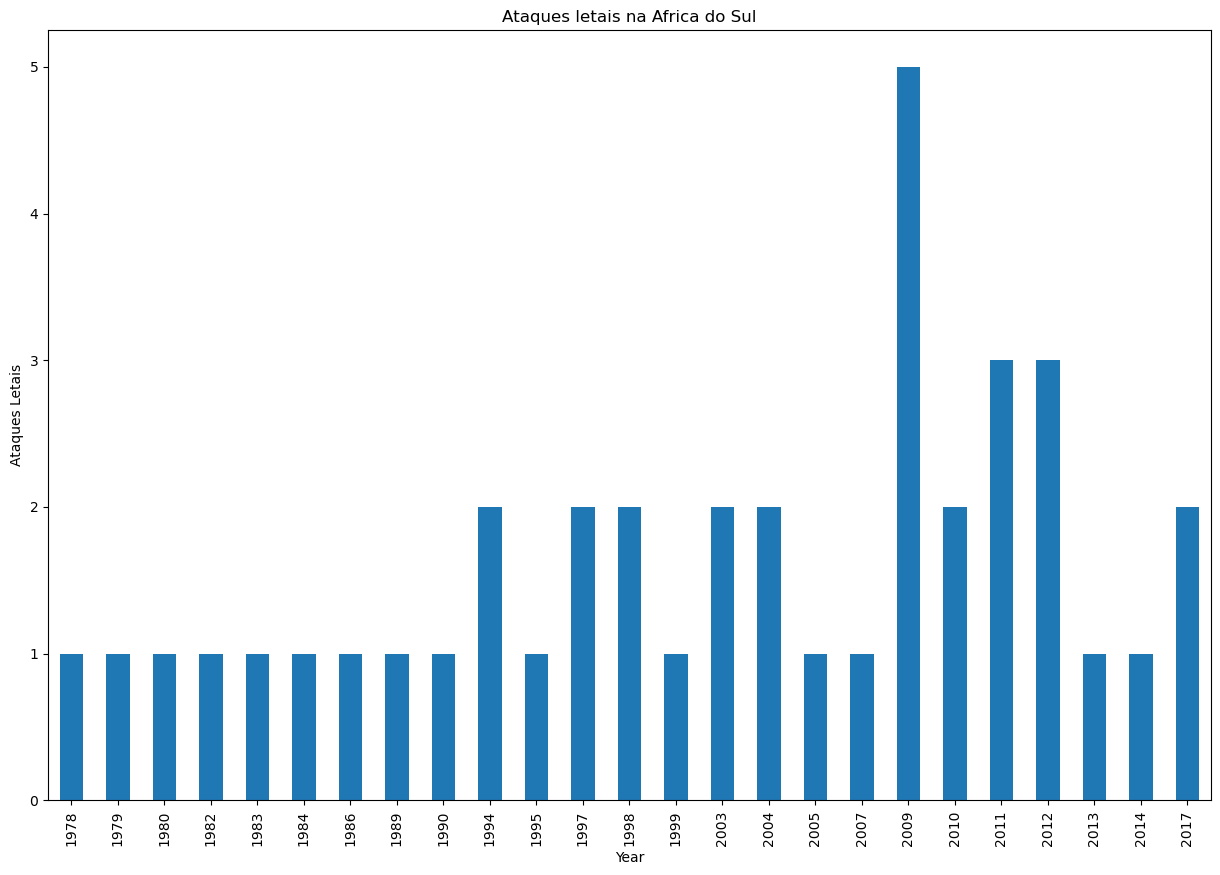

In [51]:
lethal_SA.groupby(by = 'Year').size().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais na Africa do Sul',  figsize=(15, 10))

<AxesSubplot:title={'center':'Ataques letais no Brazil'}, xlabel='Year', ylabel='Ataques Letais'>

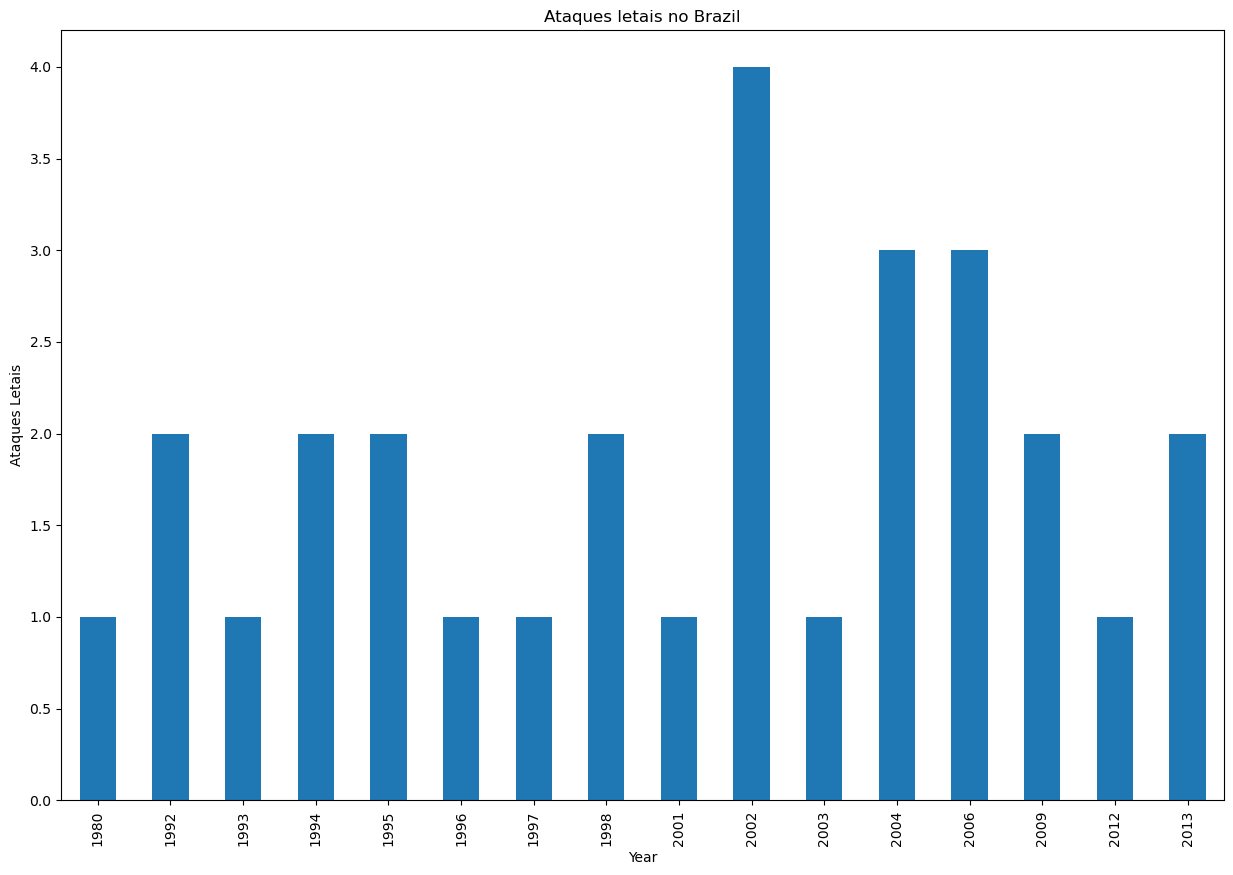

In [52]:
lethal_BR.groupby(by = 'Year').size().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais no Brazil', figsize=(15, 10))

<AxesSubplot:title={'center':'Ataques letais em Reunion'}, xlabel='Year', ylabel='Ataques Letais'>

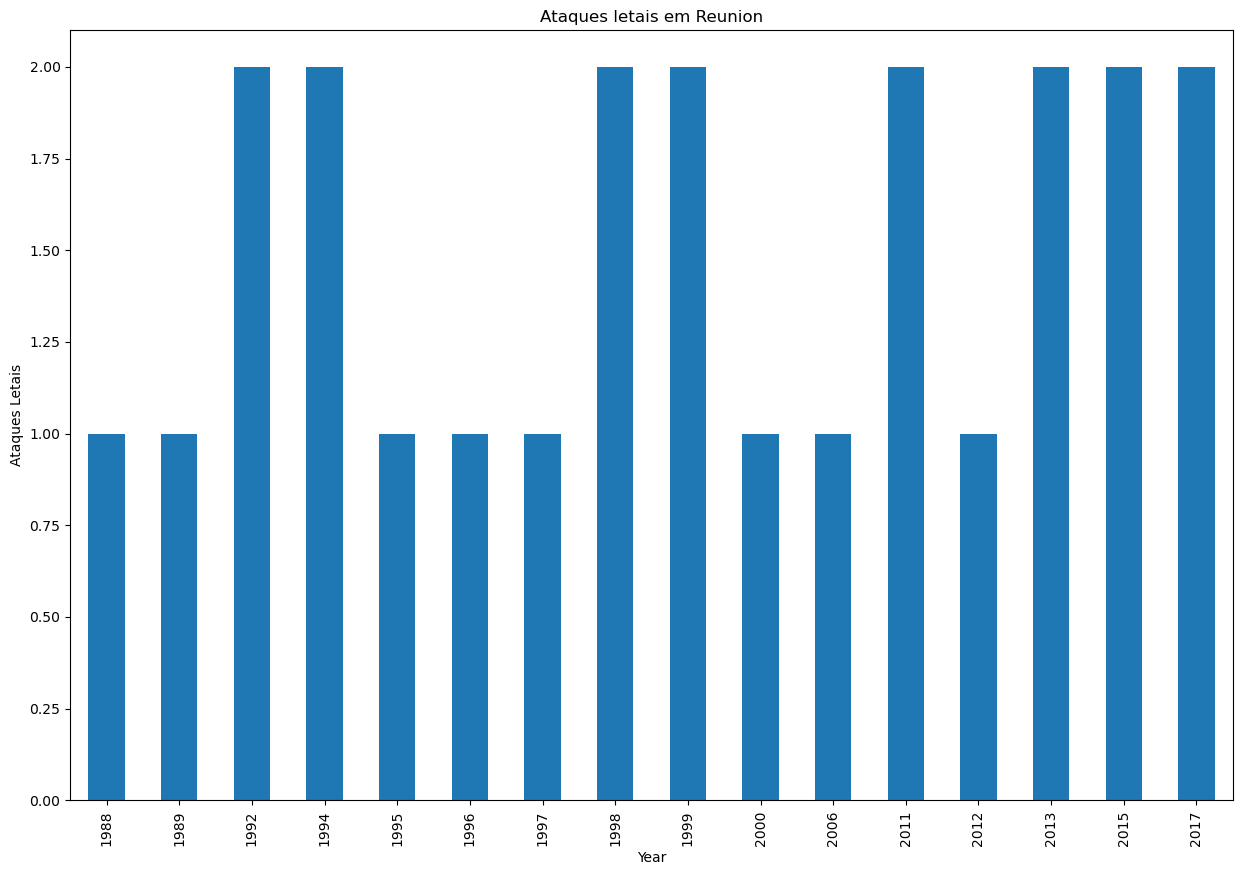

In [53]:
lethal_REU.groupby(by = 'Year').size().plot(kind='bar', ylabel = 'Ataques Letais', title = 'Ataques letais em Reunion', figsize=(15, 10))

In [54]:
ataques_totais = (
    df.groupby(by=["Country", "Year"])
    .agg(
        contagem_total=("Year", "count")
    ).reset_index()
)

In [55]:
atks_totais_australia = ataques_totais[ataques_totais['Country']=='AUSTRALIA']
atks_totais_usa = ataques_totais[ataques_totais['Country']=='USA']
atks_totais_south_africa = ataques_totais[ataques_totais['Country']=='SOUTH AFRICA']
atks_totais_brazil = ataques_totais[ataques_totais['Country']=='BRAZIL']
atks_totais_reunion = ataques_totais[ataques_totais['Country']=='REUNION']

In [56]:
ataques_letais_totais = (
    df_lethal.groupby(by=["Country", "Year"])
    .agg(contagem_letais=("Year", "count")).reset_index()
)

In [57]:
atks_letais_totais_australia = ataques_letais_totais[ataques_letais_totais['Country']=='AUSTRALIA']
atks_letais_totais_usa = ataques_letais_totais[ataques_letais_totais['Country']=='USA']
atks_letais_totais_south_africa = ataques_letais_totais[ataques_letais_totais['Country']=='SOUTH AFRICA']
atks_letais_totais_brazil = ataques_letais_totais[ataques_letais_totais['Country']=='BRAZIL']
atks_letais_totais_reunion = ataques_letais_totais[ataques_letais_totais['Country']=='REUNION']

In [58]:
australia_merged = pd.merge(atks_totais_australia, atks_letais_totais_australia, on=['Country', 'Year'])
usa_merged = pd.merge(atks_totais_usa, atks_letais_totais_usa, on=['Country', 'Year'])
south_africa_merged = pd.merge(atks_totais_south_africa, atks_letais_totais_south_africa, on=['Country', 'Year'])
brazil_merged = pd.merge(atks_totais_brazil, atks_letais_totais_brazil, on=['Country', 'Year'])
reunion_merged = pd.merge(atks_totais_reunion, atks_letais_totais_reunion, on=['Country', 'Year'])

In [59]:
australia_merged['lethal_ratio'] = australia_merged['contagem_letais'] / australia_merged['contagem_total']
usa_merged['lethal_ratio'] = usa_merged['contagem_letais'] / usa_merged['contagem_total']
south_africa_merged['lethal_ratio'] = south_africa_merged['contagem_letais'] / south_africa_merged['contagem_total']
brazil_merged['lethal_ratio'] = brazil_merged['contagem_letais'] / brazil_merged['contagem_total']
reunion_merged['lethal_ratio'] = reunion_merged['contagem_letais'] / reunion_merged['contagem_total']

<AxesSubplot:title={'center':'% de ataques letais por ano na Austrália'}, xlabel='Year'>

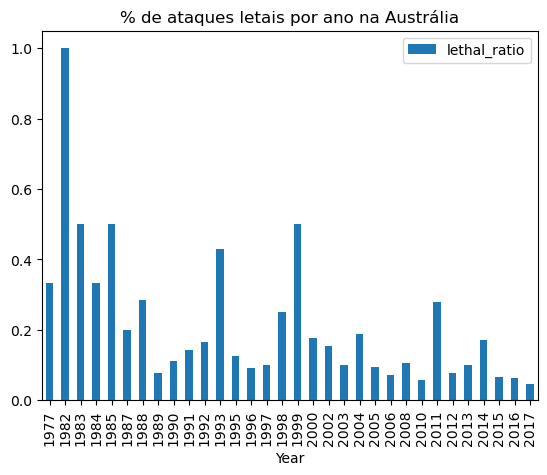

In [60]:
australia_merged.plot(x='Year', y='lethal_ratio', kind='bar', title='% de ataques letais por ano na Austrália')

<AxesSubplot:title={'center':'% de ataques letais por ano nos USA'}, xlabel='Year'>

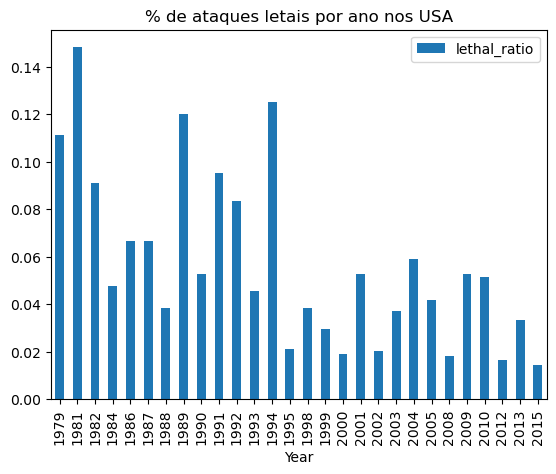

In [61]:
usa_merged.plot(x='Year', y='lethal_ratio', kind='bar', title='% de ataques letais por ano nos USA')

<AxesSubplot:title={'center':'% de ataques letais por ano na África do Sul'}, xlabel='Year'>

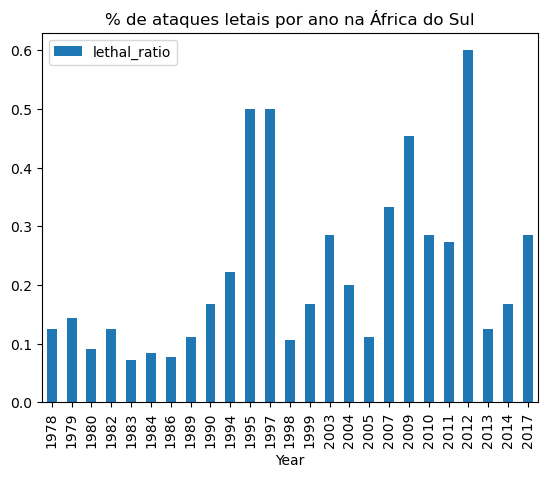

In [62]:
south_africa_merged.plot(x='Year', y='lethal_ratio', kind='bar', title='% de ataques letais por ano na África do Sul')

<AxesSubplot:title={'center':'% de ataques letais por ano no Brazil'}, xlabel='Year'>

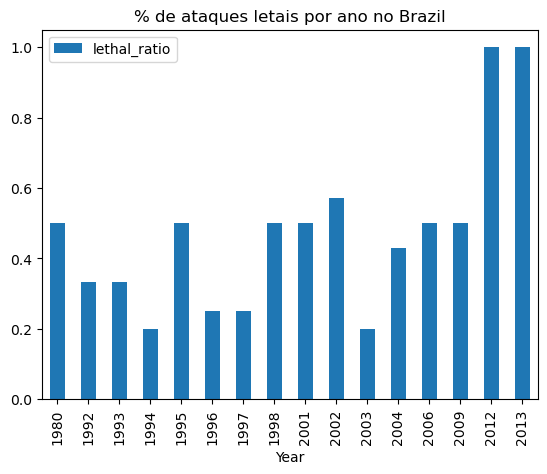

In [63]:
brazil_merged.plot(x='Year', y='lethal_ratio', kind='bar', title='% de ataques letais por ano no Brazil')

<AxesSubplot:title={'center':'% de ataques letais por ano em Reunion'}, xlabel='Year'>

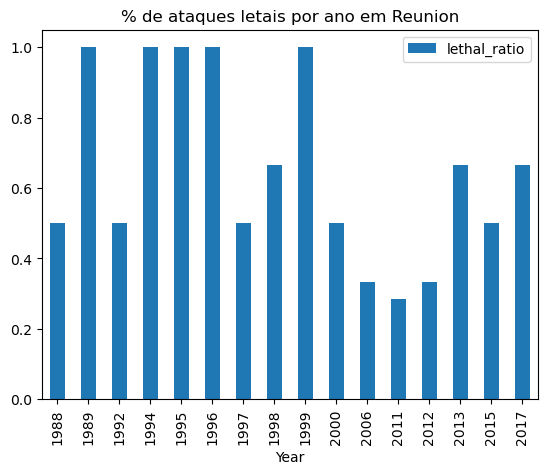

In [64]:
reunion_merged.plot(x='Year', y='lethal_ratio', kind='bar', title='% de ataques letais por ano em Reunion')

Text(0.5, 0, 'Year')

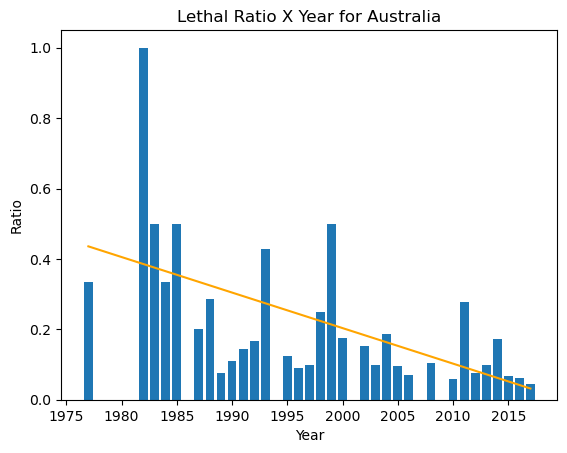

In [65]:
# tem jeito fácil de fazer uma trend line? 
# https://stackoverflow.com/questions/48842293/making-a-regression-line-through-a-bar-char-using-pandas-or-seaborn
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
#AUSTRALIA
lr = Ridge()
lr.fit(australia_merged[['Year']], australia_merged['lethal_ratio'])
plt.bar(australia_merged['Year'], australia_merged['lethal_ratio'])
plt.plot(australia_merged['Year'], lr.coef_*australia_merged['Year']+lr.intercept_, color='orange')
plt.title(label = 'Lethal Ratio X Year for Australia')
plt.ylabel("Ratio")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

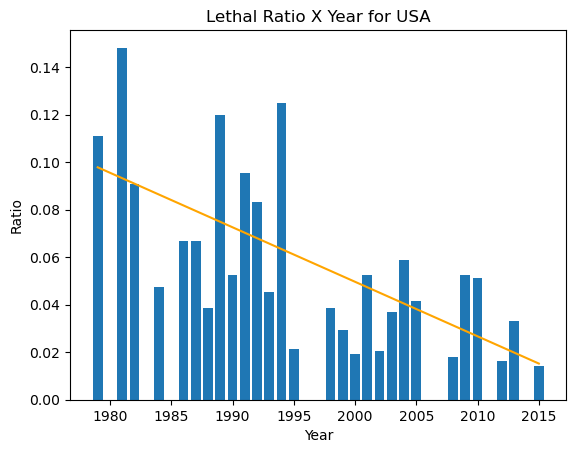

In [66]:
#USA
lr = Ridge()
lr.fit(usa_merged[['Year']], usa_merged['lethal_ratio'])
plt.bar(usa_merged['Year'], usa_merged['lethal_ratio'])
plt.plot(usa_merged['Year'], lr.coef_*usa_merged['Year']+lr.intercept_, color='orange')
plt.title(label = 'Lethal Ratio X Year for USA')
plt.ylabel("Ratio")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

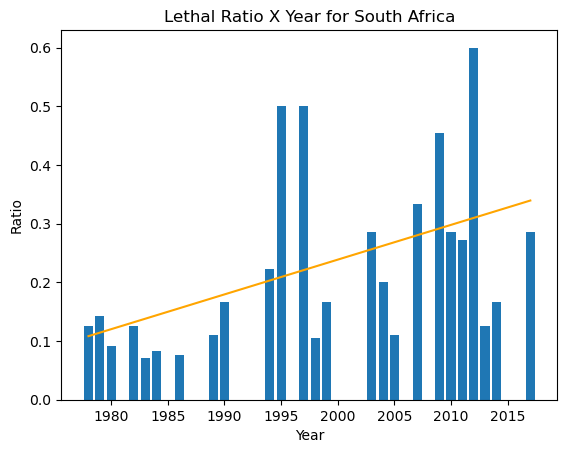

In [67]:
#AFRICA DO SUL
lr = Ridge()
lr.fit(south_africa_merged[['Year']], south_africa_merged['lethal_ratio'])
plt.bar(south_africa_merged['Year'], south_africa_merged['lethal_ratio'])
plt.plot(south_africa_merged['Year'], lr.coef_*south_africa_merged['Year']+lr.intercept_, color='orange')
plt.title(label = 'Lethal Ratio X Year for South Africa')
plt.ylabel("Ratio")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

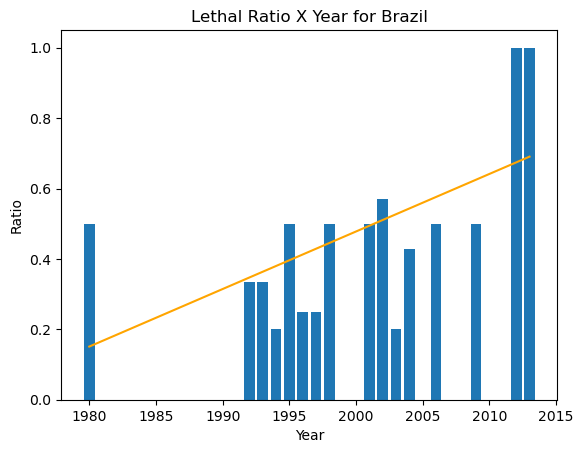

In [68]:
#BRASIL
lr = Ridge()
lr.fit(brazil_merged[['Year']], brazil_merged['lethal_ratio'])
plt.bar(brazil_merged['Year'], brazil_merged['lethal_ratio'])
plt.plot(brazil_merged['Year'], lr.coef_*brazil_merged['Year']+lr.intercept_, color='orange')
plt.title(label = 'Lethal Ratio X Year for Brazil')
plt.ylabel("Ratio")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

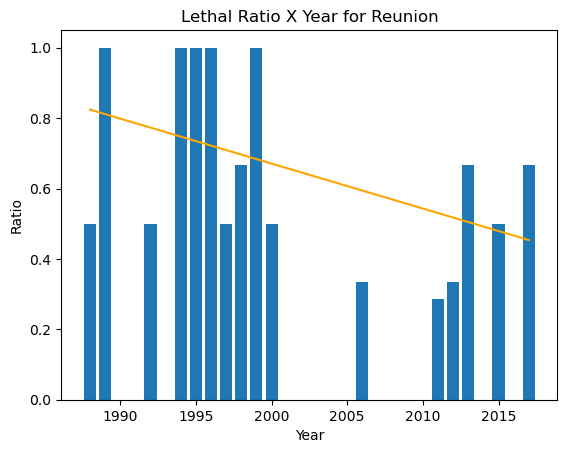

In [69]:
#REUNION
lr = Ridge()
lr.fit(reunion_merged[['Year']], reunion_merged['lethal_ratio'])
plt.bar(reunion_merged['Year'], reunion_merged['lethal_ratio'],)
plt.plot(reunion_merged['Year'], lr.coef_*reunion_merged['Year']+lr.intercept_, color='orange')
plt.title(label = 'Lethal Ratio X Year for Reunion')
plt.ylabel("Ratio")
plt.xlabel("Year")